# **1 - DATA VALIDATION**

## Importing Libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [67]:
df = pd.read_csv('audible_uncleaned.csv')

## Checking the Dataframe

In [68]:
# Returns first 5 rows of the dataframe
df.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


In [69]:
# Returns information of the columns and number of rows
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


(None, (87489, 8))

## Standardizing the Values in the 'author' Column

In [70]:
# Removing useless words
df['author'] = df['author'].str.replace('Writtenby:', '')

In [71]:
# Separating first and last name
df['author'] = df['author'].str.replace(r'([a-z])([A-Z])', r'\1 \2', regex=True)

In [72]:
# Checking results
df['author'].unique

<bound method Series.unique of 0        Geronimo Stilton
1            Rick Riordan
2             Jeff Kinney
3            Rick Riordan
4            Rick Riordan
               ...       
87484       Chris Stewart
87485      Stephen O'Shea
87486          Mark Twain
87487     Laurence Sterne
87488      Mark Kurlansky
Name: author, Length: 87489, dtype: object>

## Standardizing the Values in the 'narrator' Column

In [73]:
# Removing useless words
df['narrator'] = df['narrator'].str.replace('Narratedby:', '') 

In [74]:
# Separating first and last name
df['narrator'] = df['narrator'].str.replace(r'([a-z])([A-Z])', r'\1 \2', regex=True)

In [75]:
# Checking results
df['narrator'].unique

<bound method Series.unique of 0            Bill Lobely
1         Robbie Daymond
2            Dan Russell
3        Soneela Nankani
4        Jesse Bernstein
              ...       
87484      Chris Stewart
87485        Robert Fass
87486         Flo Gibson
87487       Anton Lesser
87488       Fleet Cooper
Name: narrator, Length: 87489, dtype: object>

## Standardizing the Values in the 'releasedate' Column

In [76]:
# Transforming realeasedate column into datetime format
df['releasedate'] = pd.to_datetime(df['releasedate'], format='%d-%m-%y')

In [77]:
# Checking results
df['releasedate'].unique

<bound method Series.unique of 0       2008-08-04
1       2018-05-01
2       2020-11-06
3       2021-10-05
4       2010-01-13
           ...    
87484   2017-03-09
87485   2017-02-21
87486   2016-12-30
87487   2011-02-23
87488   2017-03-07
Name: releasedate, Length: 87489, dtype: datetime64[ns]>

## Standardizing the Values in the 'time' Column

In [78]:
# Changing the column type into string type
df['time'] = df['time'].astype('str')

In [79]:
# Function to replace unnused strings, split and format the values
def format_time(time_str):
    time_str = time_str.replace(' hrs and ', ':').replace(' hrs', ':').replace(' mins', '')\
        .replace(' min', '').replace('hr and', '').replace(' ', '').replace('hr', '')\
            .replace('Lessthan1ute', '1').strip()

    parts = time_str.split(':')

    if len(parts) == 2:  
        hours = int(parts[0])  
        minutes = int(parts[1]) if parts[1] else 0  
        return hours * 60 + minutes  
    
    elif len(parts) == 1:  
        hours = int(parts[0])  
        return hours * 60   

In [80]:
# Applying the function
df['time'] = df['time'].apply(format_time)

In [81]:
# Checking results
df['time'].unique()

array([ 140,  788,  123, ..., 2458, 1448, 1444], dtype=int64)

In [82]:
# Changes the column name to 'duration_min', also changes de 'name' column to 'title' and 'releasedate' to 'release_date'
df.columns = ['title', 'author', 'narrator', 'duration_min', 'release_date', 'language', 'stars', 'price']

## Standardizing the Values in the 'language' column

In [83]:
# Checking values
df['language'].unique()

array(['English', 'Hindi', 'spanish', 'german', 'french', 'catalan',
       'swedish', 'italian', 'danish', 'finnish', 'dutch', 'hebrew',
       'russian', 'polish', 'galician', 'afrikaans', 'icelandic',
       'romanian', 'japanese', 'tamil', 'portuguese', 'urdu', 'hungarian',
       'czech', 'bulgarian', 'mandarin_chinese', 'basque', 'korean',
       'arabic', 'greek', 'turkish', 'ukrainian', 'slovene', 'norwegian',
       'telugu', 'lithuanian'], dtype=object)

In [84]:
# Replacing a value so it looks a bit better
df['language'] = df['language'].str.replace('mandarin_chinese', 'mandarin/chinese')

## Creating 'nb_ratings' Columns

In [85]:
# Creates the new column with the second part of information in  the 'stars' column
df['nb_ratings'] = df['stars'].str.split('stars').str[1].str.strip()

In [86]:
# Removes the word 'ratings'
df['nb_ratings'] = df['nb_ratings'].str.replace('ratings', '').str.replace(' rating', '').str.replace(',', '')

In [87]:
# Formats the data type into 'Int64'
df['nb_ratings'] = df['nb_ratings'].astype('Int64')

In [88]:
# Checking results
df['nb_ratings'].value_counts()

nb_ratings
1       5822
2       2315
3       1207
4        857
5        535
        ... 
5500       1
536        1
287        1
2236       1
126        1
Name: count, Length: 384, dtype: Int64

## Standardizing the Values in the 'stars' Column

In [89]:
df['stars'] = df['stars'].str.split('stars').str[0].str.strip()

In [90]:
df['stars'] = df['stars'].str.replace('out of 5', '').replace('Not rated yet', np.nan)

In [91]:
# Formats 'stars' column into numeric data type
df['stars'] = pd.to_numeric(df['stars'].str.strip(), errors='coerce')

In [92]:
# Checking results
df['stars'].unique()

array([5. , 4.5, 4. , nan, 3.5, 3. , 1. , 2. , 2.5, 1.5])

## Standardizing the Values in the 'price' Column

In [93]:
# Replaces 'Free' values with a 0 integer and ',' with an empty string
df['price'] = df['price'].str.replace('Free', '0').str.replace(',', '')

In [94]:
# Changes the data type to integer
df['price'] = pd.to_numeric(df['price'], errors='coerce').astype('int64')

In [95]:
# Checking results
df['price'].unique

<bound method Series.unique of 0        468
1        820
2        410
3        615
4        820
        ... 
87484    596
87485    820
87486    938
87487    680
87488    569
Name: price, Length: 87489, dtype: int64>

### Creating 'author_id' Column

In [96]:
# Creates new column
df['author_id'] = pd.factorize(df['author'])[0]

In [97]:
# Checking results
df['author_id'].nunique()

48374

### Creating 'narrator_id' Column

In [98]:
# Creates new column
df['narrator_id'] = pd.factorize(df['narrator'])[0]

In [99]:
# Checking results
df['narrator_id'].nunique()

29717

### Creating 'language_id' Column

In [100]:
# Creates new column
df['language_id'] = pd.factorize(df['language'])[0]

In [101]:
# Checking results
df['language_id'].nunique()

36

## Duplicate Values


In [102]:
# Checking for duplicates
df.duplicated().sum()

0

## Missing Values

In [103]:
# Checking the total number of missing values
df.isna().sum()

title               0
author              0
narrator            0
duration_min        0
release_date        0
language            0
stars           72417
price               0
nb_ratings      72417
author_id           0
narrator_id         0
language_id         0
dtype: int64

In [104]:
# Filling missing values with 0's, because having 0 ratings and 0 stars means the audiobook was not rated yet
df['stars'] = df['stars'].fillna(0)
df['nb_ratings'] = df['nb_ratings'].fillna(0)

### Checking final results

In [105]:
# Returns first 5 rows of the dataframe
df.head()

,title,author,narrator,duration_min,release_date,language,stars,price,nb_ratings,author_id,narrator_id,language_id
0,Geronimo Stilton #11 & #12,Geronimo Stilton,Bill Lobely,140,2008-08-04,English,5.0,468,34,0,0,0
1,The Burning Maze,Rick Riordan,Robbie Daymond,788,2018-05-01,English,4.5,820,41,1,1,0
2,The Deep End,Jeff Kinney,Dan Russell,123,2020-11-06,English,4.5,410,38,2,2,0
3,Daughter of the Deep,Rick Riordan,Soneela Nankani,676,2021-10-05,English,4.5,615,12,1,3,0
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,Jesse Bernstein,600,2010-01-13,English,4.5,820,181,1,4,0


In [106]:
# Returns informations of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         87489 non-null  object        
 1   author        87489 non-null  object        
 2   narrator      87489 non-null  object        
 3   duration_min  87489 non-null  int64         
 4   release_date  87489 non-null  datetime64[ns]
 5   language      87489 non-null  object        
 6   stars         87489 non-null  float64       
 7   price         87489 non-null  int64         
 8   nb_ratings    87489 non-null  Int64         
 9   author_id     87489 non-null  int64         
 10  narrator_id   87489 non-null  int64         
 11  language_id   87489 non-null  int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 8.1+ MB


# **2 - EXPLORATORY ANALYSIS AND DATA VISUALIZATION**

### Descriptive Statistics

In [120]:
df[['duration_min', 'release_date', 'price', 'nb_ratings']].describe()

,duration_min,release_date,price,nb_ratings
count,87489.000000,87489,87489.000000,87489.0
mean,1106.998777,2018-06-23 22:53:20.411480064,559.009224,3.723371
min,60.000000,1998-12-27 00:00:00,0.000000,0.0
25%,352.000000,2016-09-06 00:00:00,268.000000,0.0
50%,537.000000,2020-02-06 00:00:00,585.000000,0.0
75%,849.000000,2021-08-17 00:00:00,755.000000,0.0
max,9540.000000,2025-11-14 00:00:00,7198.000000,12573.0
std,1782.928073,NaN,336.096631,86.499601


### Languages

In [ ]:
# Total number of books by language
df['language'].value_counts().reset_index()

,language,count
0,English,61884
1,german,8295
2,spanish,3496
3,japanese,3167
4,italian,2694
5,french,2386
6,russian,1804
7,danish,935
8,portuguese,526
9,swedish,515


In [108]:
# Creating dataframe that contains the top 5 languages and the total of the other languages
top5languages = df['language'].value_counts().head()
otherlanguages = pd.Series({'others':df['language'].value_counts().iloc[5:].sum()})

final_counts = pd.concat([top5languages, otherlanguages])

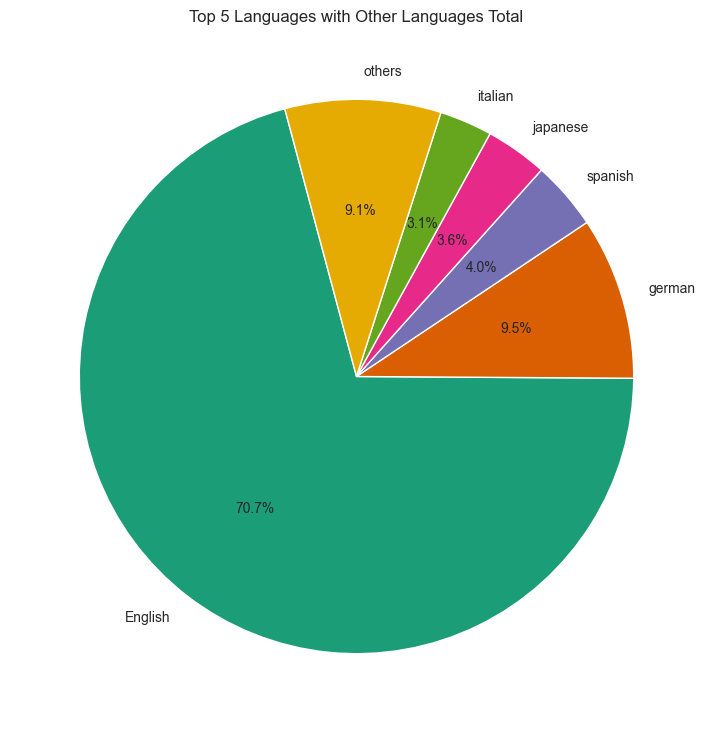

In [109]:
# Pieplot displaying the the proportions of the top 5 languages and the total of the other languages
colors = sns.color_palette('Dark2')

plt.figure(figsize=(10, 9))
plt.pie(final_counts, labels=final_counts.index, autopct='%1.1f%%', colors=colors, startangle=105)

plt.title('Top 5 Languages with Other Languages Total')
plt.show()

### Release Date

In [110]:
# Range of release dates
df['release_date'].min(), df['release_date'].max()

(Timestamp('1998-12-27 00:00:00'), Timestamp('2025-11-14 00:00:00'))

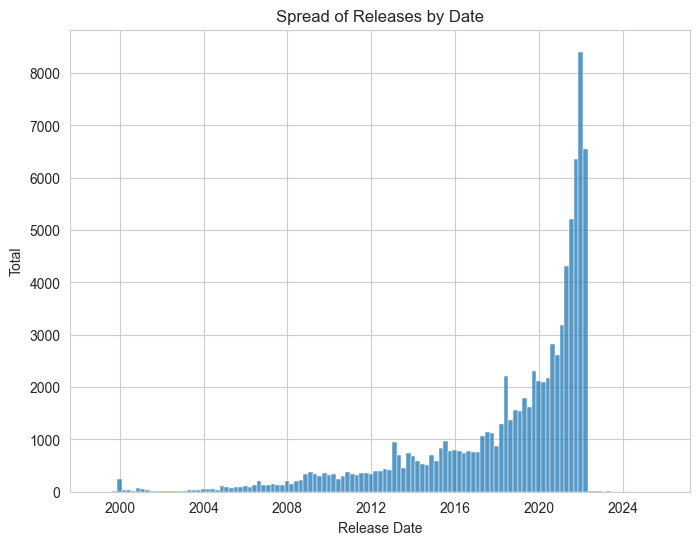

In [111]:
# Displays the spread of releases by date
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='release_date')

plt.title('Spread of Releases by Date')
plt.xlabel('Release Date')
plt.ylabel('Total')
plt.show()

### Correlation

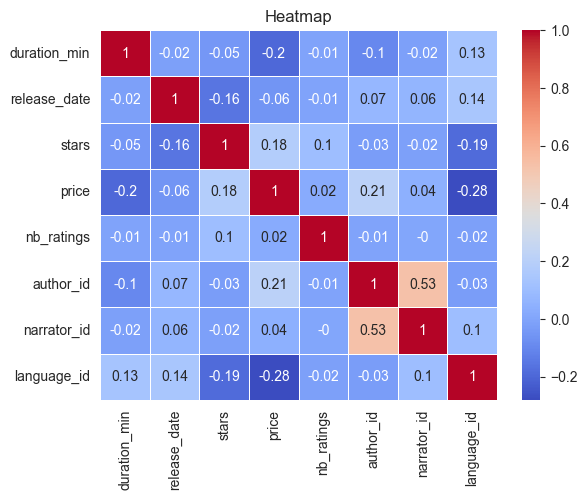

In [112]:
# Selects numeric columns
corr_columns = ['duration_min', 'release_date', 'stars', 'price', 'nb_ratings', 'author_id', 'narrator_id', 'language_id']

# Displays the heatmap of correlations
df_corr = df[corr_columns].corr().round(2)

sns.heatmap(df_corr, annot=True, cmap="coolwarm", cbar=True, linewidths=0.5)

plt.title("Heatmap")
plt.show()

### Top 20 Books With the Most Ratings

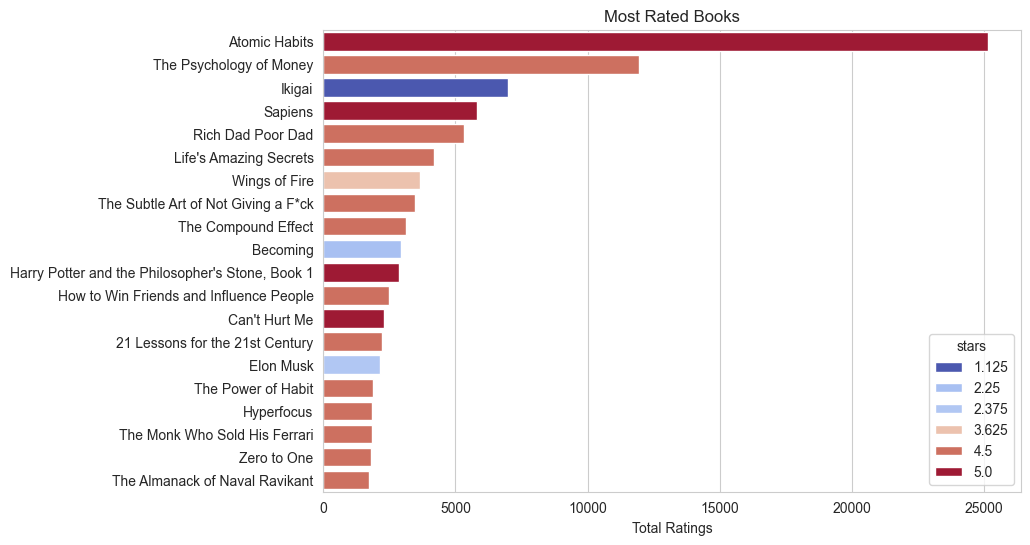

In [113]:
top20booksratings = df.groupby('title')[['nb_ratings', 'stars']]\
    .agg({'nb_ratings': 'sum','stars': 'mean'}).sort_values(by='nb_ratings',ascending=False).head(20).reset_index()

sns.set_style('whitegrid')
plt.figure(figsize=(9, 6))

sns.barplot(data=top20booksratings, x='nb_ratings', y='title', hue='stars', palette='coolwarm')
plt.title('Most Rated Books')
plt.xlabel('Total Ratings')
plt.ylabel('')
plt.show()


### Top 20 Most Rated Books With 5 Stars

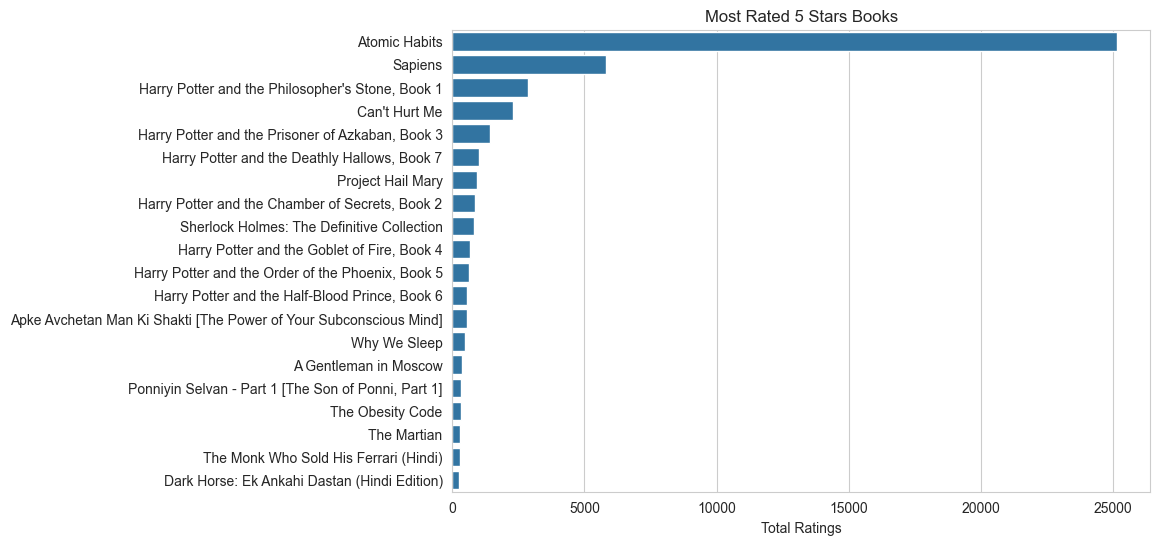

In [114]:
top20mostrated5stars = df.groupby('title')[['stars', 'nb_ratings']].agg({'stars': 'mean', 'nb_ratings': 'sum'})\
    .sort_values(by=['stars', 'nb_ratings'], ascending=False).head(20)

sns.set_style('whitegrid')
plt.figure(figsize=(9, 6))

sns.barplot(data=top20mostrated5stars, x='nb_ratings', y='title')
plt.title('Most Rated 5 Stars Books')
plt.xlabel('Total Ratings')
plt.ylabel('')
plt.show()

### Top 10 Authors With the Most Titles

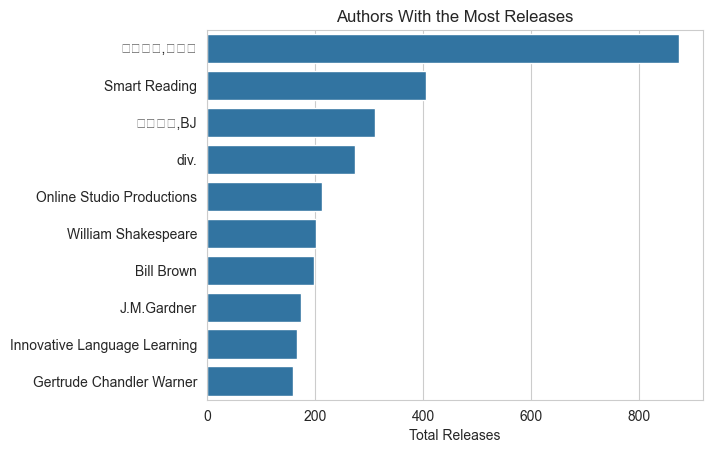

,author,count
0,"矢島雅弘,石橋遊",874
1,Smart Reading,405
2,"中西貴之,BJ",311
3,div.,274
4,Online Studio Productions,212
5,William Shakespeare,201
6,Bill Brown,198
7,J.M.Gardner,174
8,Innovative Language Learning,167
9,Gertrude Chandler Warner,160


In [ ]:
top10authorstitles = df['author'].value_counts().sort_values(ascending=False).reset_index().head(10)

sns.barplot(data=top10authorstitles, y='author', x='count')
plt.title('Authors With the Most Titles')
plt.xlabel('Total Releases')
plt.ylabel('')
plt.show()

top10authorstitles

### Top 10 Authors With the Most 5 Stars Ratings

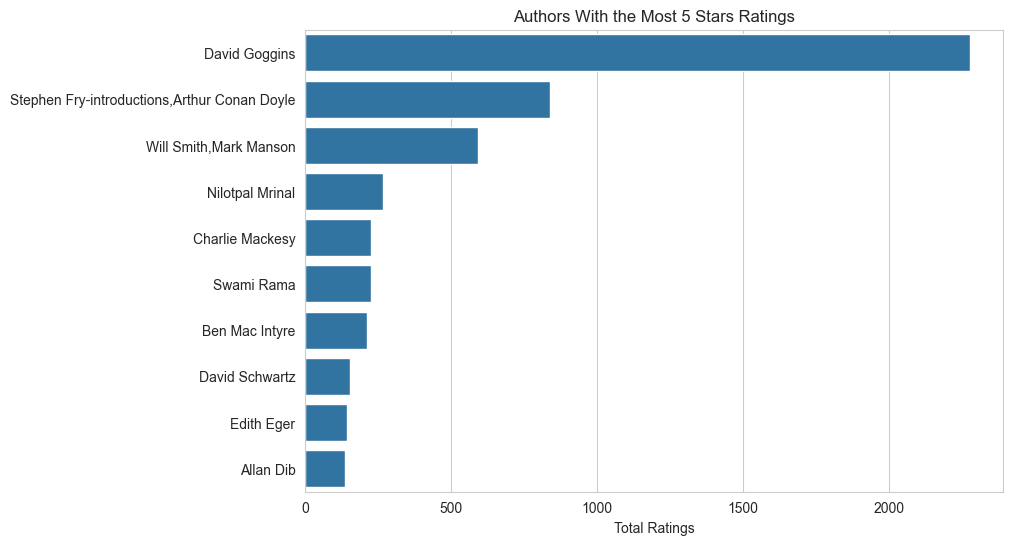

In [116]:
top20authors = df.groupby('author')[['stars', 'nb_ratings']].agg({'stars': 'mean', 'nb_ratings': 'sum'})\
    .sort_values(by=['stars', 'nb_ratings'], ascending=False).head(10)

sns.set_style('whitegrid')
plt.figure(figsize=(9, 6))

sns.barplot(data=top20authors, x='nb_ratings', y='author')
plt.title('Authors With the Most 5 Stars Ratings')
plt.xlabel('Total Ratings')
plt.ylabel('')
plt.show()